[255 255 255]


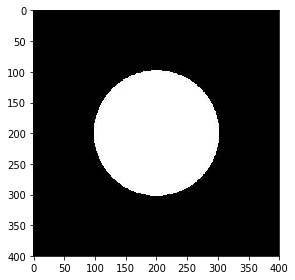

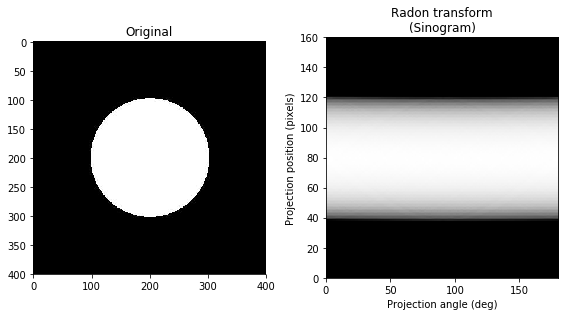

In [24]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import skimage as ski
from skimage import io

def narysuj(X,Y):
    plt.plot(X,Y)
    plt.yticks(range(max(Y)+1))
    plt.grid(True, linestyle='--')
    plt.xlim(0,max(X))
    plt.ylim(0,max(Y))
    plt.show()
    
    
def bresenhamLow(x0,y0,x1,y1):
    pikselX = []
    pikselY = []
    dx = x1 - x0
    dy = y1 - y0
    yi = 1
    if dy < 0:
        yi = -1
        dy = -dy
    D = 2*dy - dx
    y = y0

    for x in range(x0,x1+1):
        pikselX.append(x)
        pikselY.append(y)
        if D > 0:
            y = y + yi
            D = D - 2*dx
        D = D + 2*dy
    return pikselX,pikselY
    
def bresenhamHigh(x0,y0, x1,y1):
    pikselX = []
    pikselY = []
    dx = x1 - x0
    dy = y1 - y0
    xi = 1
    if dx < 0:
        xi = -1
        dx = -dx
    D = 2*dx - dy
    x = x0

    for y in range(y0,y1+1):
        pikselX.append(x)
        pikselY.append(y)
        if D > 0:
            x = x + xi
            D = D - 2*dy
        D = D + 2*dx
    return pikselX,pikselY
    

def bresenhamS(x0,y0, x1,y1):
    pikselX = []
    pikselY = []
    if abs(y1 - y0) < abs(x1 - x0):
        if x0 > x1:
            
            return bresenhamLow(x1, y1, x0, y0)
        else:
            return bresenhamLow(x0, y0, x1, y1)
    else:
        if y0 > y1:
            return bresenhamHigh(x1, y1, x0, y0)
        else:
            return bresenhamHigh(x0, y0, x1, y1) 
            

def wczytajObraz(nazwaPliku):
    image = io.imread(nazwaPliku)
    #image = rgb2gray(image)
    io.imshow(image)
    return image

from skimage.transform import radon, rescale
obraz = wczytajObraz("tomograf-zdjecia/Kolo.jpg")
print(obraz[200,200])
io.imshow(obraz)

image = io.imread("tomograf-zdjecia/Kolo.jpg", as_gray=True)
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(obraz, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

Tworze sinogram z obrazu - iteracja:  0 / 360
Tworze sinogram z obrazu - iteracja:  60 / 360
Tworze sinogram z obrazu - iteracja:  120 / 360
Tworze sinogram z obrazu - iteracja:  180 / 360
Tworze sinogram z obrazu - iteracja:  240 / 360
Tworze sinogram z obrazu - iteracja:  300 / 360


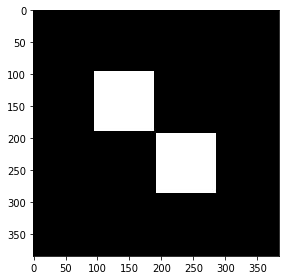

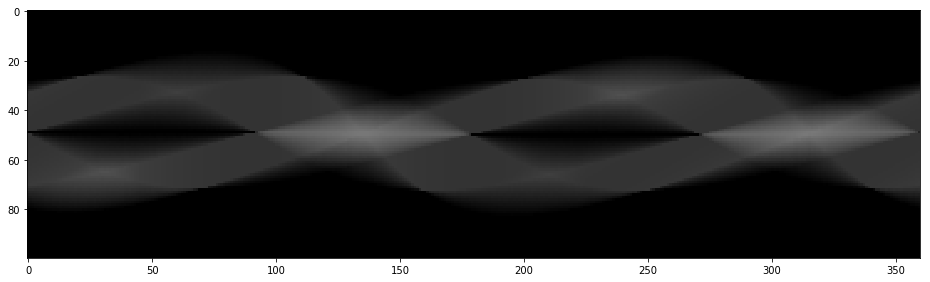

Tworze obraz z sinogramu - iteracja:  0 / 360
Tworze obraz z sinogramu - iteracja:  60 / 360
Tworze obraz z sinogramu - iteracja:  120 / 360
Tworze obraz z sinogramu - iteracja:  180 / 360
Tworze obraz z sinogramu - iteracja:  240 / 360
Tworze obraz z sinogramu - iteracja:  300 / 360


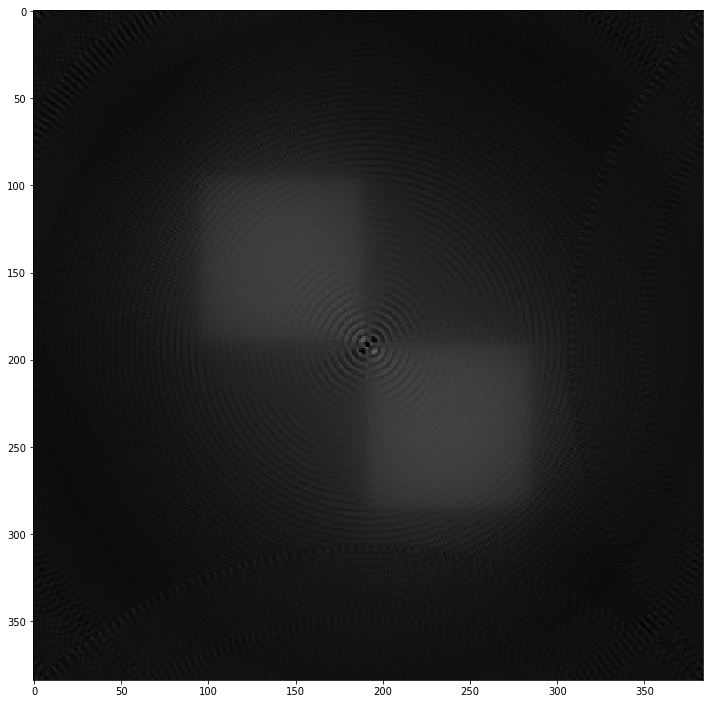

In [54]:
import numpy as np
#import matplotlib.pyplot as plt

obraz = wczytajObraz("tomograf-zdjecia/Kwadraty2.jpg")

r = np.sqrt(obraz.shape[0]**2 + obraz.shape[1]**2)/2


##### PARAMETRY #####
alfa = 0 * (np.pi / 180)
Alfa1 = alfa
deltaAlfa = 1
liczbaDetektorow = 100
ileIteracji = int(360 / deltaAlfa)
rozpietosc = 180 * (np.pi / 180)
#stworz sinogram
sinogram = np.zeros([liczbaDetektorow,ileIteracji,3],dtype=np.int64)
sinogram.fill(0)

for k in range(ileIteracji):
    if(k % 60==0): 
        print('Tworze sinogram z obrazu - iteracja: ',k,'/',ileIteracji)
    alfa = (Alfa1 + k*deltaAlfa) * np.pi / 180
    
    emiter = np.array([r*np.cos(alfa),r*np.sin(alfa)])
    
    emiter[0] = emiter[0] + obraz.shape[0]/2
    emiter[1] = obraz.shape[1]/2-emiter[1]
    
    detektory = np.array([[0 for i in range(2)] for j in range(liczbaDetektorow)])

    detektory[0,0] = r * np.cos(alfa + np.pi-rozpietosc/2)
    detektory[0,1] = r * np.sin(alfa + np.pi-rozpietosc/2)
    detektory[0,0] = detektory[0,0] + obraz.shape[0]/2
    detektory[0,1] = obraz.shape[1]/2-detektory[0,1] 

    for i in range(1,liczbaDetektorow):
        detektory[i,0] = r * np.cos(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))
        detektory[i,1] = r * np.sin(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))

        detektory[i,0] = detektory[i,0] + obraz.shape[0]/2
        detektory[i,1] = obraz.shape[1]/2-detektory[i,1]  


    wszystkieLinieX = []
    wszystkieLinieY = []
    for i in range(liczbaDetektorow):
        liniaX,liniaY = bresenhamS(int(emiter[0]),int(emiter[1]),int(detektory[i,0]),int(detektory[i,1]))
        
        wszystkieLinieX.append(liniaX)
        wszystkieLinieY.append(liniaY)

    srednia = []
    for i in range(len(wszystkieLinieX)):
        suma=np.array([0,0,0])
        liczbaElementowWsrodku=0
        for j in range(len(wszystkieLinieX[i])):
            if (wszystkieLinieX[i][j] < obraz.shape[0]) and (wszystkieLinieY[i][j] < obraz.shape[1]):
                suma += obraz[wszystkieLinieX[i][j],wszystkieLinieY[i][j]]
                liczbaElementowWsrodku += 1
        if liczbaElementowWsrodku > 0:
            suma[0] /= liczbaElementowWsrodku
            suma[1] /= liczbaElementowWsrodku
            suma[2] /= liczbaElementowWsrodku
        srednia.append(suma)
    
    for i in range(liczbaDetektorow):
        sinogram[i,k] += srednia[i]
    


#plt.yticks(np.arange(0,50,step=0.5), fontsize=9)
plt.figure(figsize=(16,20))
plt.imshow(sinogram, interpolation='nearest') #interpolation='none'
plt.show()

## PARAMETRY DO ODTWORZENIA OBRAZU Z SINOGRAMU (te same) ##
alfa = 0 * (np.pi / 180)
Alfa1 = alfa
#deltaAlfa = 1
#liczbaDetektorow = 50
#ileIteracji = int(360 / deltaAlfa)
#rozpietosc = 90 * (np.pi / 180)

ileRazyLiczony = np.zeros((obraz.shape[0],obraz.shape[1]))

wartosciDanychPikseli = np.zeros((obraz.shape[0],obraz.shape[1]))
wartosciDanychPikseli.fill(0)

obrazZSinogramu = np.zeros([obraz.shape[0],obraz.shape[1],3],dtype=np.int64)
obrazZSinogramu.fill(0)
for k in range(ileIteracji):
    if(k % 60==0): 
        print('Tworze obraz z sinogramu - iteracja: ',k,'/',ileIteracji)
    alfa = (Alfa1 + k*deltaAlfa) * np.pi / 180
    
    emiter = np.array([r*np.cos(alfa),r*np.sin(alfa)])
    
    emiter[0] = emiter[0] + obraz.shape[0]/2
    emiter[1] = obraz.shape[1]/2-emiter[1]
    
    detektory = np.array([[0 for i in range(2)] for j in range(liczbaDetektorow)])

    detektory[0,0] = r * np.cos(alfa + np.pi-rozpietosc/2)
    detektory[0,1] = r * np.sin(alfa + np.pi-rozpietosc/2)
    detektory[0,0] = detektory[0,0] + obraz.shape[0]/2
    detektory[0,1] = obraz.shape[1]/2-detektory[0,1] 

    for i in range(1,liczbaDetektorow):
        detektory[i,0] = r * np.cos(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))
        detektory[i,1] = r * np.sin(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))

        detektory[i,0] = detektory[i,0] + obraz.shape[0]/2
        detektory[i,1] = obraz.shape[1]/2-detektory[i,1]  


    wszystkieLinieX = []
    wszystkieLinieY = []
    for i in range(liczbaDetektorow):
        liniaX,liniaY = bresenhamS(int(emiter[0]),int(emiter[1]),int(detektory[i,0]),int(detektory[i,1]))
        
        wszystkieLinieX.append(liniaX)
        wszystkieLinieY.append(liniaY)

    
    for i in range(len(wszystkieLinieX)):
        for j in range(len(wszystkieLinieX[i])):
            if (wszystkieLinieX[i][j] < obraz.shape[0]) and (wszystkieLinieY[i][j] < obraz.shape[1]):
                wartosciDanychPikseli[wszystkieLinieX[i][j],wszystkieLinieY[i][j]] += sinogram[i,k,0]
                ileRazyLiczony[wszystkieLinieX[i][j],wszystkieLinieY[i][j]] += 1
            
    
for i in range(obraz.shape[0]):
    for j in range(obraz.shape[1]):
        if(ileRazyLiczony[i,j] > 0):
            wartosciDanychPikseli[i,j] /= ileRazyLiczony[i,j]
        obrazZSinogramu[i,j,0] = wartosciDanychPikseli[i,j]
        obrazZSinogramu[i,j,1] = wartosciDanychPikseli[i,j]
        obrazZSinogramu[i,j,2] = wartosciDanychPikseli[i,j]
            

plt.figure(figsize=(12,16))
plt.imshow(obrazZSinogramu, interpolation='nearest')
plt.show()
#io.imshow(obraz)

sinogram.shape =  (180, 360, 3)
iteracja:  0 / 360
alfa =  0.0  stopni
iteracja:  60 / 360
alfa =  59.0  stopni
iteracja:  120 / 360
alfa =  119.0  stopni
iteracja:  180 / 360
alfa =  179.0  stopni
iteracja:  240 / 360
alfa =  238.99999999999997  stopni
iteracja:  300 / 360
alfa =  298.99999999999994  stopni


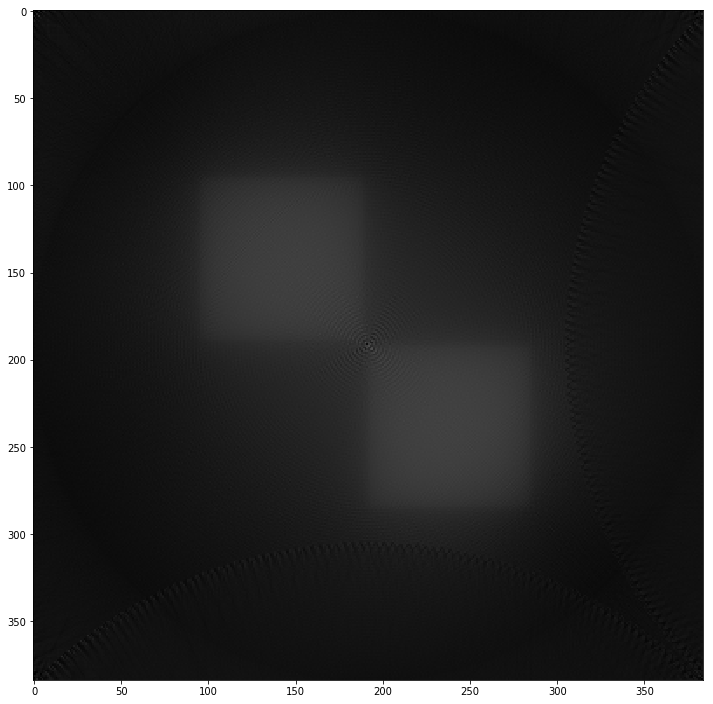